# seaborn

References
- 

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting

- Plot Types: [regplot](#regplot), [lmplot](#lmplot), lineplot, barplot, swarmplot, scatterplot, violinplot, stripplot

<h2><a name="regplot">Regplot</a</h2>

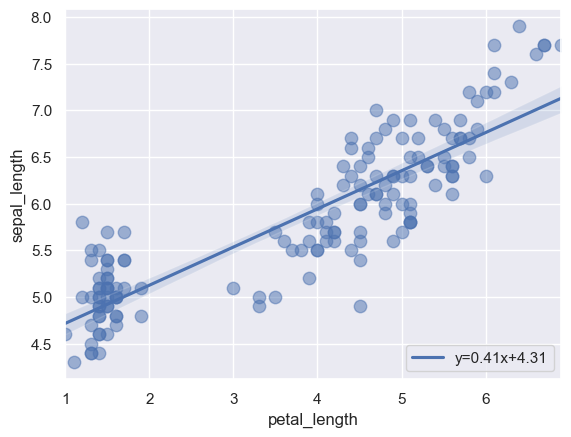

In [28]:
import scipy.stats as stats
df = sns.load_dataset('iris')

slope, intercept, r_value, p_value, std_err = stats.linregress(df['petal_length'], df['sepal_length'])
sns.regplot(data=df,
        x='petal_length',
        y='sepal_length',
        #x_estimator=np.mean,
        scatter_kws={"s": 80, 'alpha':0.5},
        ci=95,
        line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)},
        )
plt.legend(loc='lower right')
plt.show()
print()

<h2><a name="lmplot">lmplot</a></h2>

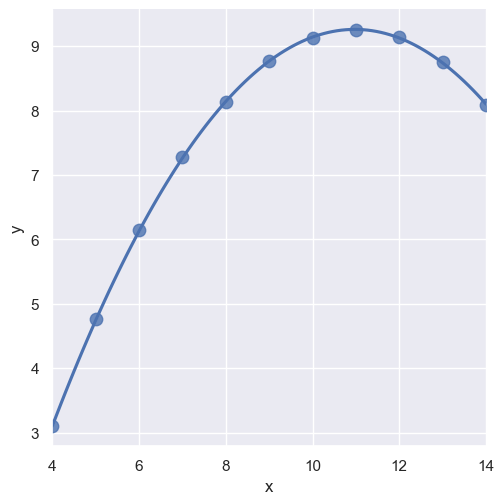

In [29]:
df = sns.load_dataset('anscombe')

sns.lmplot(data=df.query("dataset=='II'"),
            x='x',
            y='y',
            order=2,
            #robust=True,
            scatter_kws={"s": 80},
            y_jitter=0.03,
            ci=95,
            #lowess=True    # for nonparametric regression
            )
plt.show()
print()

## Barplot

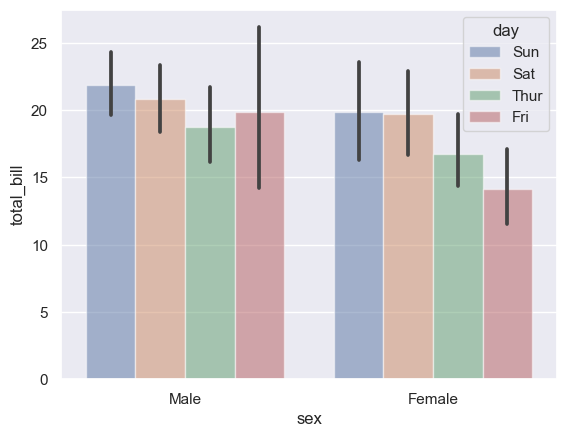

In [30]:
df = sns.load_dataset('tips')

labels = df['day'].unique()
sns.barplot(data=df,
        x='sex',
        y='total_bill',
        estimator=np.mean,  # default is mean
        hue='day',
        hue_order=labels,
        orient='v',
        alpha=0.5,
        ci=95,
        #ax=axs[i]
        )
plt.show()
print()

<h2><a name="stripplot">Stripplots</a></h2>

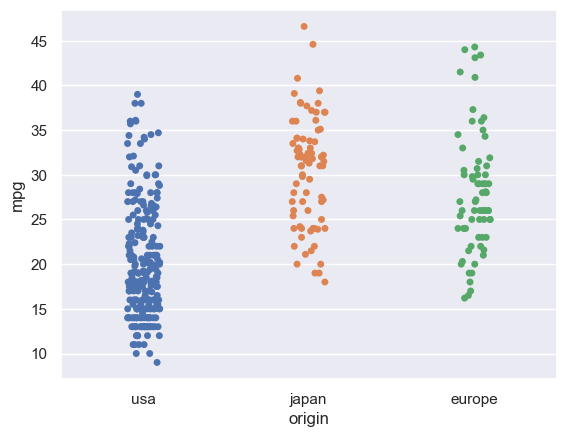

In [31]:
df = sns.load_dataset('mpg')
sns.stripplot(data=df, x='origin', y='mpg')
plt.show()
print()

<h2><a name="swarmplot">Swarmplots</a></h2>

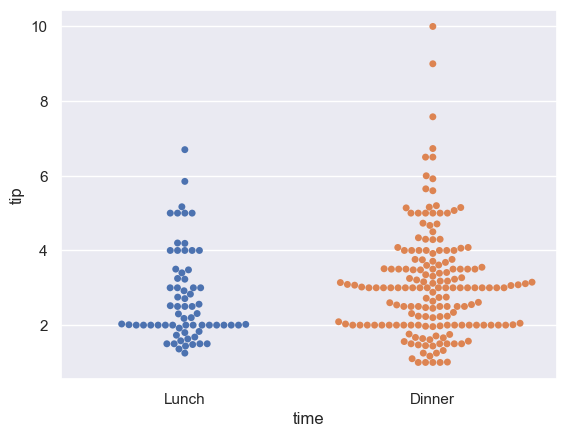

In [32]:
df = sns.load_dataset('tips')
sns.swarmplot(data=df, 
                x='time', 
                y='tip'
                )
plt.show()
print()

<h2><a name="boxplots">Boxplots</a></h2>

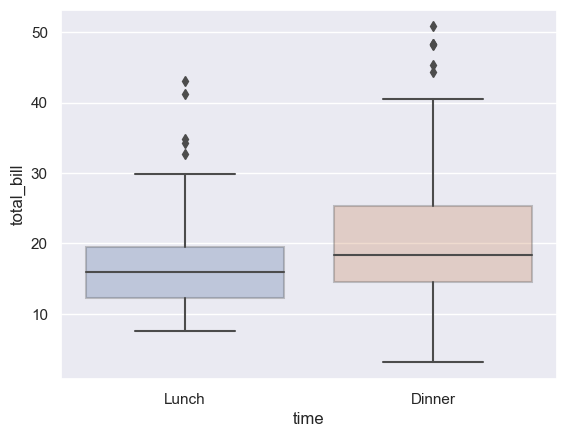

In [33]:
df = sns.load_dataset('tips')
sns.boxplot(data=df, 
            x='time', 
            y='total_bill', 
            boxprops=dict(alpha=0.3)
            )
plt.show()
print()

<h2><a name="heatmap">Heatmap</a></h2>

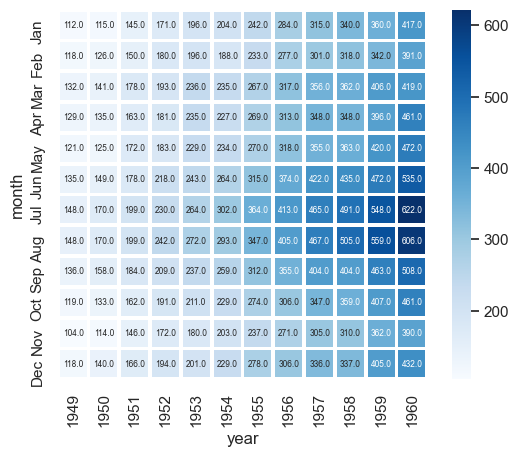

In [34]:
sns.set()
df = sns.load_dataset('flights')
df = df.pivot('month', 'year', 'passengers')
# Can add vmin and vmax for bar min and max values
ax = sns.heatmap(df,  
                linewidths=2, 
                square=True, 
                cmap='Blues',
                annot=True,
                annot_kws={'fontsize':6},
                fmt='.1f',
                cbar=1,
                cbar_kws={'orientation':'vertical'}
                )
plt.show()

<h2><a name="scatterplot">Scatterplots</a></h2>

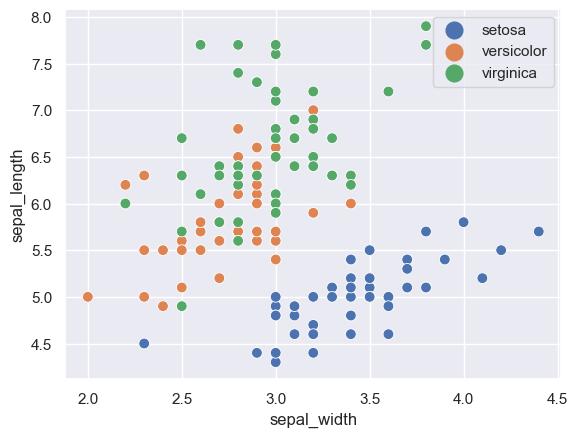

In [35]:
df = sns.load_dataset('iris')

sns.scatterplot(data = df,
                x='sepal_width',
                y='sepal_length',
                hue='species',
                x_jitter=20,
                s=60
                )
plt.legend(markerscale=2)
plt.show()
print()                

<h2><a name="distplot">Distplot</a></h2>

<h2><a name='displot'>Displot</a></h2>

- Histogram: kind="hist"
- KDEPlot: kind="kde"
- ECDFPlot: kind="ecdf"

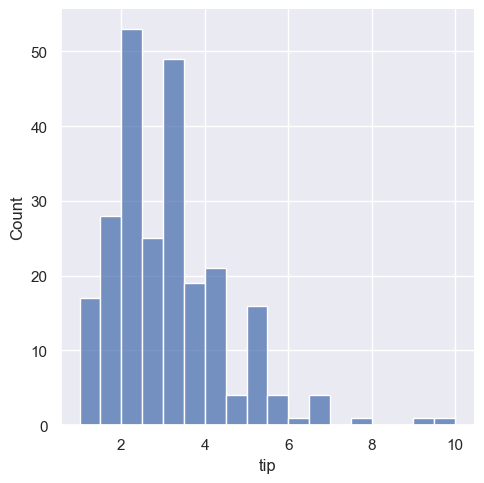

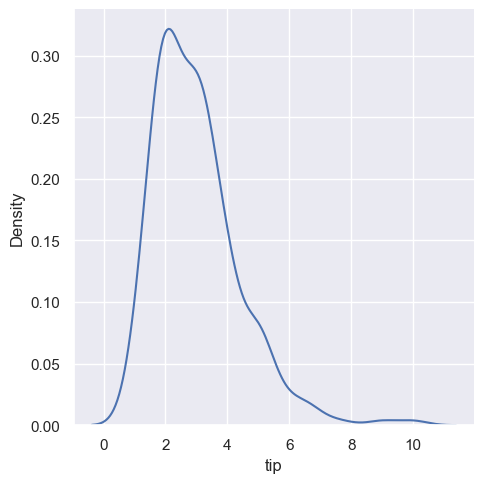

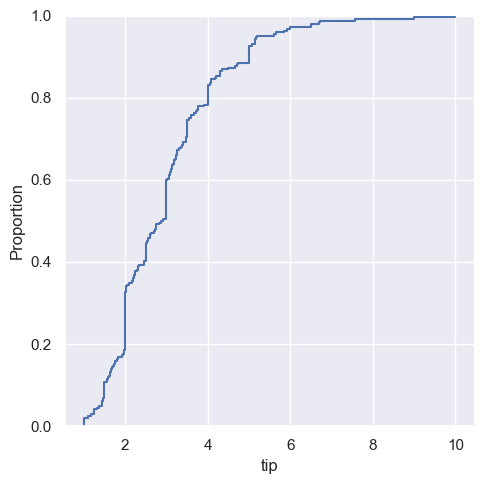

In [45]:
df = sns.load_dataset('tips')
sns.displot(data=df,
                x='tip',
                kind='hist',
                )
sns.displot(data=df,
                x='tip',
                kind='kde',
                )
sns.displot(data=df,
                x='tip',
                kind='ecdf',
                )
plt.show()
print()

## Displot: Histplot, Kdeplot, Ecdfplot

- <a name="histplot">Histplot</a>
- <a name="kdeplot">Kdeplot</a>
- <a name="ecdfplot">Ecdfplot</a>

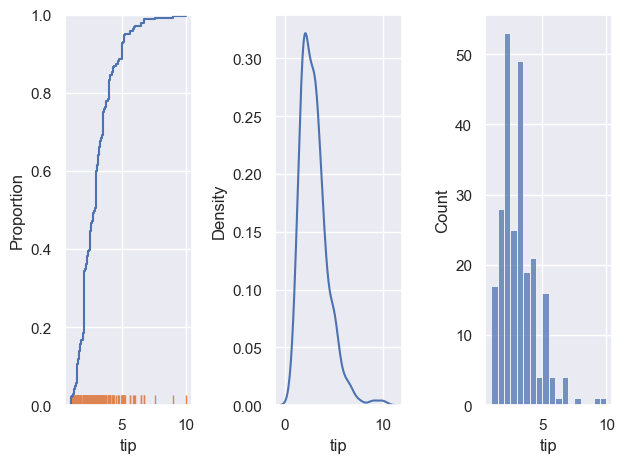

In [68]:
df = sns.load_dataset('tips')
fig, axs = plt.subplots(1, 3, sharey=False)
axs = axs.flatten()
sns.ecdfplot(df, 
            x='tip',
            ax=axs[0]
            )
sns.rugplot(data=df, 
            x='tip',
            ax=axs[0]
            )
sns.kdeplot(data=df, 
            x='tip',
            ax=axs[1]
            )
sns.histplot(df, 
            x='tip',
            ax=axs[2]
            )

fig.tight_layout()
plt.show()
print()

<h2><a name="jointplot">Jointplot</a></h2>

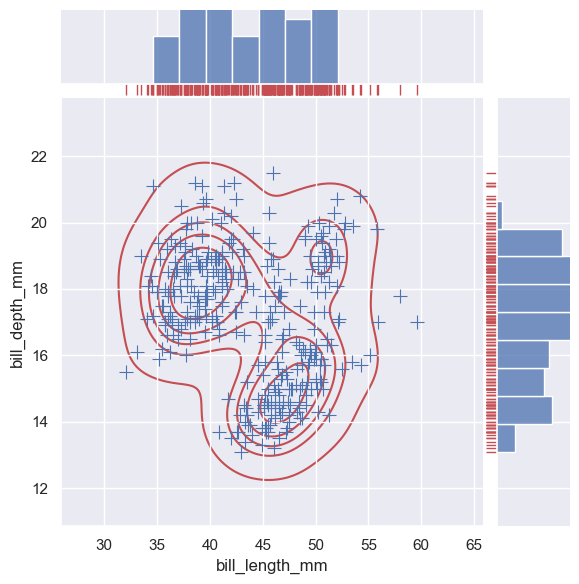

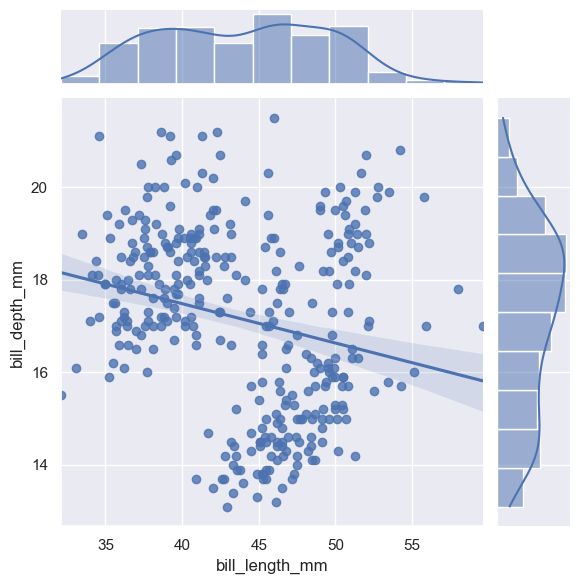

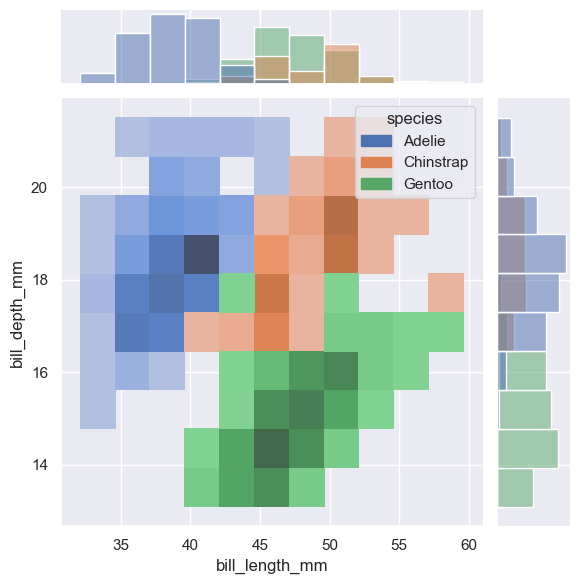

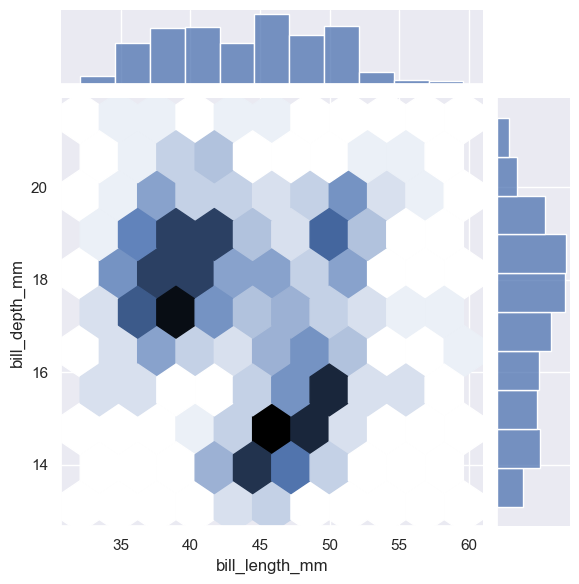

In [67]:
df = sns.load_dataset('penguins')

g = sns.jointplot(data=df, 
                    x="bill_length_mm", 
                    y="bill_depth_mm",
                    marker = '+',
                    s=100,
                    )
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

sns.jointplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                kind='reg'
                )
sns.jointplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                kind='hist'
                )
sns.jointplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                kind='hex'
                )
plt.show()
print()

<h2><a name="pairgrid">Pairgrid</a></h2>

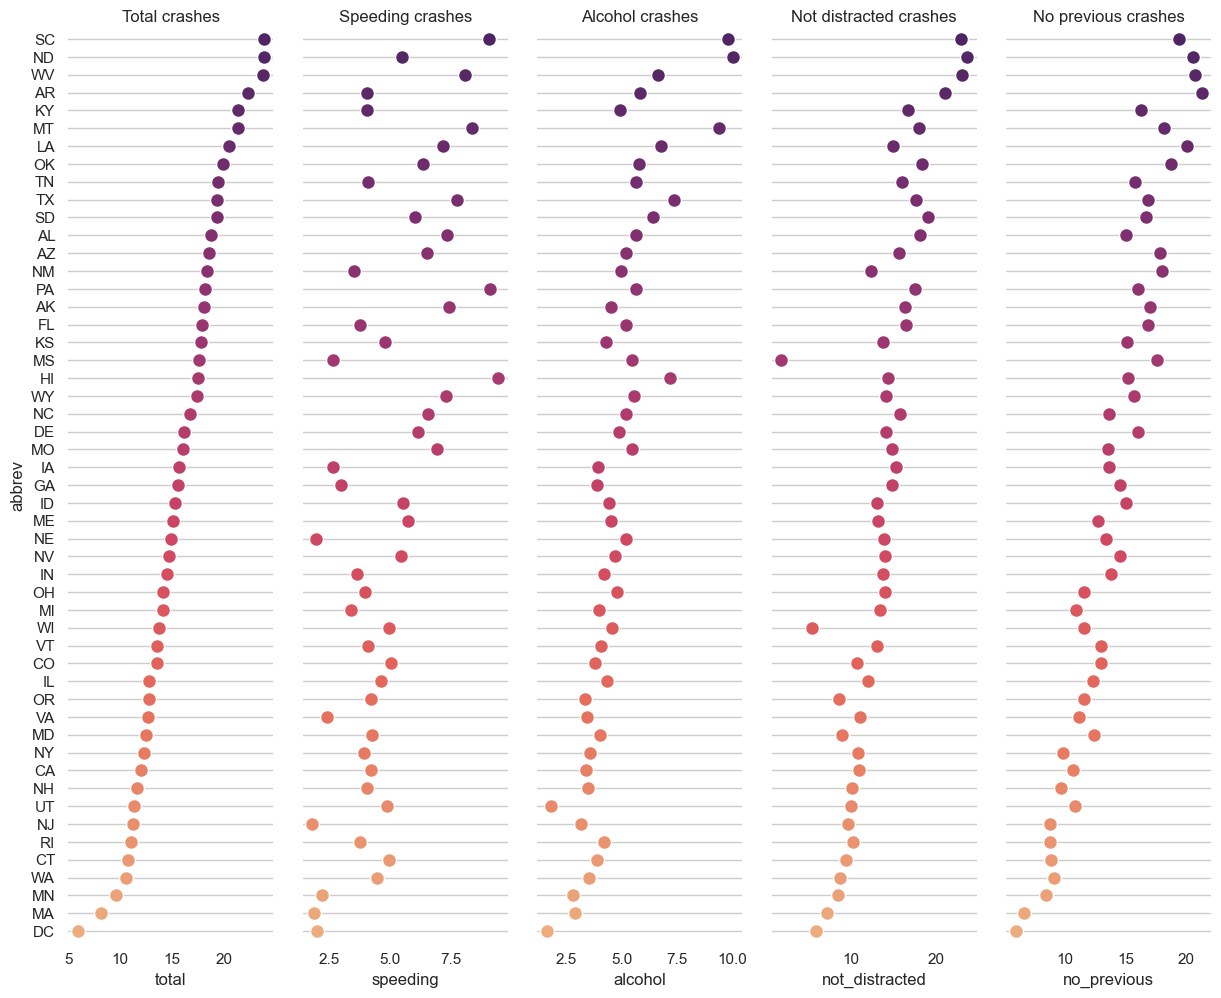

In [75]:
df = sns.load_dataset('car_crashes')
sns.set_theme(style="whitegrid")

g = sns.PairGrid(df.sort_values("total", ascending=False),
                 x_vars=df.columns[:-3], 
                 y_vars=["abbrev"],
                 height=10, 
                 aspect=.25
                 )
g.map(sns.stripplot, 
        size=10, 
        orient="h", 
        jitter=False,
        palette="flare_r", 
        linewidth=1, 
        edgecolor="w"
        )

titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.show()
print()

## Themes

- [Color Palettes Example](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)
- [Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)